In [24]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np . random . seed ( 0)
N = 100
half_n = N//2
r = 10
s = r /16
t = np.random.uniform (0 , 2*np.pi , half_n )
n = s*np.random.randn(half_n)
x , y = (r+n)*np.cos(t),(r+n)*np.sin(t)
print(x)
X_circ = np.hstack((x.reshape(half_n , 1),y.reshape(half_n,1)))
m, b = -1, 2
x = np.linspace(-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n , 1),y.reshape(half_n , 1)))
X = np.vstack((X_circ,X_line))

[ -8.67447247  -4.51014391  -7.6899153    5.44553168  -0.41011641
  -7.33683801  -9.75483615  -3.49989167  -7.29779861  -6.48865377
   3.30211597   6.85612082  -9.77832576  -9.84340458   3.14914901
   6.62409831  -0.26056993   1.95364305   9.90177352   3.89365452
  -7.50014959   6.32438511  10.09208644   7.06328881   9.80718835
   4.15501155  -4.26107848   9.91421681   1.2616966    8.45775557
   2.89324428  -9.1524124    8.98666268   0.54401352   9.68287833
  -6.6602279    9.89958788   9.44399927   5.4850336   -0.24688141
   6.23000494  -6.91478915   3.47806785   4.71846394   4.0462117
  -4.65853718 -11.00052475   9.10663514   8.00090809  -8.01812607]


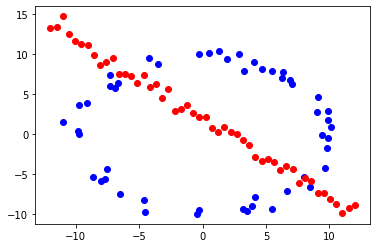

In [25]:
plt.plot(X_circ[:,0],X_circ[:,1],'o',color='b')
plt.plot(X_line[:,0],X_line[:,1],'o',color='r')


In [26]:
X_circ

array([[ -8.67447247,  -5.38074965],
       [ -4.51014391,  -9.70820099],
       [ -7.6899153 ,  -5.57157609],
       [  5.44553168,  -9.29312144],
       [ -0.41011641,  -9.94246843],
       [ -7.33683801,   6.10790601],
       [ -9.75483615,   0.07816767],
       [ -3.49989167,   8.7930901 ],
       [ -7.29779861,   7.42174704],
       [ -6.48865377,  -7.39353894],
       [  3.30211597,   7.88143256],
       [  6.85612082,   6.8348695 ],
       [ -9.77832576,   3.68887304],
       [ -9.84340458,   0.44486303],
       [  3.14914901,  -9.28053328],
       [  6.62409831,  -7.09089772],
       [ -0.26056993,  -9.39091632],
       [  1.95364305,   9.44634166],
       [  9.90177352,  -0.48966199],
       [  3.89365452,  -8.93622091],
       [ -7.50014959,  -4.29445538],
       [  6.32438511,   7.85497599],
       [ 10.09208644,   0.9175571 ],
       [  7.06328881,   6.24662131],
       [  9.80718835,  -1.65936694],
       [  4.15501155,  -7.83466228],
       [ -4.26107848,   9.56612184],
 

In [27]:
import random
# randomPoints = []
# for i in range(3):
#     randomPoints.append(random.randint(0,51))

# randomPoints

def RadiusAndCenter(randomPoints):

    # taking 3 points
    A_c =X_circ[randomPoints[0]]
    B_c = X_circ[randomPoints[1]]
    C_c = X_circ[randomPoints[2]]

    middle_AB = [(A_c[0]+B_c[0])/2,(A_c[1]+B_c[1])/2] # take the middle point on AB line
  
    middle_BC = [(B_c[0]+C_c[0])/2,(B_c[1]+C_c[1])/2] # take the middle point on BC line
   

    if (B_c[1]-A_c[1])!=0 and (C_c[1]-B_c[1])!=0:
        AB_perpendiular_gradient = -(B_c[0]-A_c[0])/(B_c[1]-A_c[1])       
        BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1])        

        AB_perpendiular_C = middle_AB[1]-AB_perpendiular_gradient*middle_AB[0]        
        BC_perpendiular_C = middle_BC[1]-BC_perpendiular_gradient*middle_BC[0]        

        Center_X = (BC_perpendiular_C-AB_perpendiular_C)/(AB_perpendiular_gradient-BC_perpendiular_gradient)
        Center_Y = AB_perpendiular_gradient*Center_X + AB_perpendiular_C

    elif (B_c[1]-A_c[1])==0:
        BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1]) 

        BC_perpendiular_C = middle_BC[1]-BC_perpendiular_gradient*middle_BC[0]  

        Center_Y = B_c[1]
        Center_X = (Center_Y-BC_perpendiular_C)/BC_perpendiular_gradient

    elif (C_c[1]-B_c[1])==0:
        AB_perpendiular_gradient = -(B_c[0]-A_c[0])/(B_c[1]-A_c[1]) 
        AB_perpendiular_C = middle_AB[1]-AB_perpendiular_gradient*middle_AB[0] 

        Center_Y = B_c[1]
        Center_X = (Center_Y-AB_perpendiular_C)/AB_perpendiular_gradient

    radius = ((Center_Y-A_c[1])**2 + (Center_X-A_c[0])**2)**0.5

    return Center_X,Center_Y,radius


print(RadiusAndCenter([0,1,2]))




(-9.039509561193203, -9.89942971435314, 4.533400669156246)


In [28]:
def DistanceBW2Pts(pt1,pt2):
    return np.sqrt((pt2[1]-pt1[1])**2+(pt2[0]-pt1[0])**2)

print(DistanceBW2Pts(RadiusAndCenter([0,1,2])[0:2],X_circ[0]))
    

4.533400669156246


In [45]:
threshold = 0.5

pointsList=[]
countlist = []
iterations = 1000
for k in range(iterations):
    count = 0
    randomPoints = []
    for i in range(3):
        randomPoints.append(random.randint(0,49))
    pointsList.append(randomPoints)
    for j in range(50):
        # print(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],X_circ[j]))
        if abs(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],X_circ[j])-RadiusAndCenter(randomPoints)[2]) <= threshold:
            count+=1
    countlist.append(count)

# print(countlist)
# print(pointsList)

pt =RadiusAndCenter(pointsList[countlist.index(max(countlist))])
print(pt[0])
    

C:\Users\User\AppData\Local\Temp\ipykernel_12760\46415721.py:27: RuntimeWarning: invalid value encountered in double_scalars
  Center_X = (BC_perpendiular_C-AB_perpendiular_C)/(AB_perpendiular_gradient-BC_perpendiular_gradient)
C:\Users\User\AppData\Local\Temp\ipykernel_12760\46415721.py:31: RuntimeWarning: invalid value encountered in double_scalars
  BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1])


-0.24107051678300484


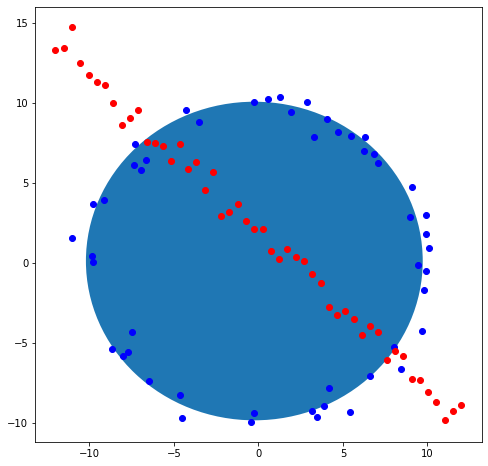

In [55]:
plt.figure(figsize=(8,8))
plt.plot(X_circ[:,0],X_circ[:,1],'o',color='b')
plt.plot(X_line[:,0],X_line[:,1],'o',color='r')
circle = plt.Circle((pt[0],pt[1]),pt[2])
# circle = plt.Circle((0,0),5)
plt.gca().add_patch(circle)
plt.show()